Importing required libraries

In [118]:
import matplotlib.pyplot as plt
import nltk

# make sure that graphs are embedded into our notebook output
%matplotlib inline

Gathering the text and removing stop words

In [119]:
#Text Path
textpath = "./Charles Dickens.txt"

#Open file
with open(textpath, "r") as file:
    text = file.read().lower()

    
listofToken = nltk.word_tokenize(text)

theText = nltk.Text(listofToken)

#Parse for only words
theText = [token for token in theText if token[0].isalpha()]

stopwords = nltk.corpus.stopwords.words("english")

#Remove the stop words from the list
theText = [token for token in theText if token not in stopwords]

Trying to match different frequncy in a plot

  said    mr.  would    one little   upon  could   know    old   time    man   much  never   miss   like 
  6412   4763   2476   2417   2072   2062   1995   1767   1645   1644   1453   1378   1378   1374   1354 


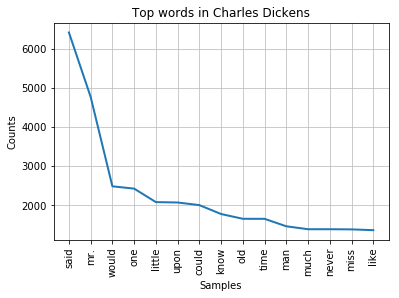

In [120]:
#Find the frequency distribution
NewFreqs = nltk.FreqDist(theText)

#Display the first 25 result in a tab form
NewFreqs.tabulate(15)

#Plot the first 25 results
NewFreqs.plot(15, title="Top words in Charles Dickens")


Now trying ot match frequency of different words and in terms of Mr. and main characters

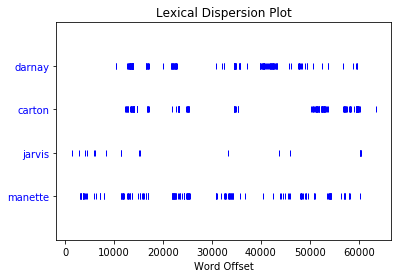

In [121]:
theText = nltk.Text(theText)
theText.dispersion_plot(["darnay", "carton", "jarvis", "manette"])


Dividing it into sections for a better picture

In [122]:
numWords = len(theText)
sections = 5
numSectWords = int(numWords/sections)

print(numWords)
print(numSectWords)

ListofWords = ["mr.", "darnay","carton","jarvis","manette"]

freqsOfWord = [[],[],[],[],[]] # This is the list for the frequencies for each section
count = 0
for word in ListofWords:
    print("Starting search with " + word + "\n")
    for n in range(5):
        startSearch = n * numSectWords # Calculate the index of the start of the section
        stopSearch = startSearch + numSectWords - 1 # Calculate the end of the section
        # Get the frequency of the word in the section and append to list
        freqsOfWord[count].append(theText[startSearch:stopSearch].count(word)) 
        print("Added " + str(theText[startSearch:stopSearch].count(word)) + " for word " + word + " section " + str(n))
    count += 1

# Here we check the list
print("\n")
print(freqsOfWord)


406699
81339
Starting search with mr.

Added 717 for word mr. section 0
Added 581 for word mr. section 1
Added 1060 for word mr. section 2
Added 1318 for word mr. section 3
Added 1087 for word mr. section 4
Starting search with darnay

Added 145 for word darnay section 0
Added 0 for word darnay section 1
Added 0 for word darnay section 2
Added 0 for word darnay section 3
Added 0 for word darnay section 4
Starting search with carton

Added 154 for word carton section 0
Added 0 for word carton section 1
Added 0 for word carton section 2
Added 0 for word carton section 3
Added 0 for word carton section 4
Starting search with jarvis

Added 19 for word jarvis section 0
Added 0 for word jarvis section 1
Added 0 for word jarvis section 2
Added 0 for word jarvis section 3
Added 0 for word jarvis section 4
Starting search with manette

Added 159 for word manette section 0
Added 0 for word manette section 1
Added 0 for word manette section 2
Added 0 for word manette section 3
Added 0 for word ma

Graphing the results

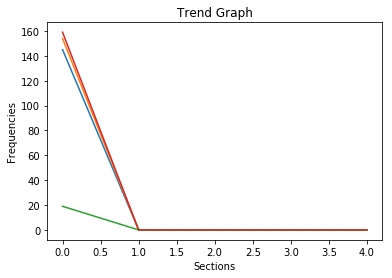

In [123]:
#plt.plot(freqsOfWord[0])
plt.plot(freqsOfWord[1])
plt.plot(freqsOfWord[2])
plt.plot(freqsOfWord[3])
plt.plot(freqsOfWord[4])

plt.xlabel('Sections') # X Axis Label
plt.ylabel('Frequencies') # Y Axis Label
plt.title('Trend Graph') # Plot Title


plt.show() # Show the plot.

Historgram

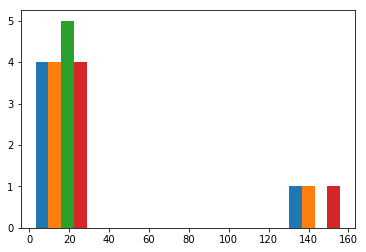

In [124]:
#plt.plot(freqsOfWord[0])
plt.hist((freqsOfWord[1],freqsOfWord[2],freqsOfWord[3],freqsOfWord[4]), bins=5)

plt.show() # Show the plot.

Covert to function

In [125]:
def wordPerSection(theText, word, numSection):
    freqsOfWord = []
    for n in range(numSection):
        startSearch = n * numSectWords # Calculate the index of the start of the section
        stopSearch = startSearch + numSectWords - 1 # Calculate the end of the section
        # Get the frequency of the word in the section and append to list
        freqsOfWord.append(theText[startSearch:stopSearch].count(word)) 
    return freqsOfWord

Trying the function results 

In [126]:
print(wordPerSection(theText, "carton", 5))

[0, 0, 0, 0, 0]


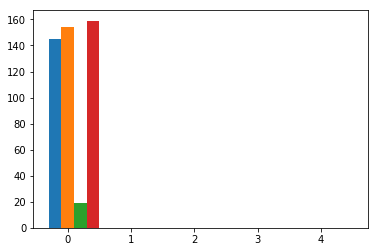

In [128]:
import numpy as np

Frequency = wordPerSection(theText, "darnay", 5)
Frequency2 = wordPerSection(theText, "carton", 5)
Frequency3 = wordPerSection(theText, "jarvis", 5)
Frequency4 = wordPerSection(theText, "manette", 5)

index = np.arange(5)
ax =plt.subplot(111)

ax.bar(index-0.2,Frequency, width=0.2,align='center')
ax.bar(index,Frequency2, width=0.2,align='center')
ax.bar(index+0.2,Frequency3, width=0.2,align='center')
ax.bar(index+0.4,Frequency4, width=0.2,align='center')


plt.show()



